# COGS 108 Final Project

Team Members: Thalal Cassim, Kevin Chen, Yongji Shen, Ansuman Somasundaram, Wei Zeng

# Data Wrangling

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# read from data set
suicide = pd.read_csv("./datasets/suicide-rates-overview-1985-to-2016.csv")

In [15]:
#select data from those following countries from our data set
selected = ["Canada","United States","United Kingdom","Australia",'Argentina',"Thailand","Sri Lanka","South Africa"]
tmp = list()   
for i in (suicide.index):
    for country in selected:
        if suicide.loc[i,"country"]==country:
            tmp.append(suicide.loc[i].tolist())
df = pd.DataFrame(columns = suicide.columns)
for i in tmp:
    df = df.append(pd.Series(i, index=suicide.columns), ignore_index=True)

In [16]:
#suicide.isnull().any()
suicideHDI = suicide.dropna()

dfHDI = df.dropna()

In [17]:
#sex,age,dgc,and hdi for all countries
suicide_sex = suicide[['country','year','sex','suicides_no','population']]
suicide_age = suicide[['country','year','age','suicides_no','population']]
suicide_gdp = suicide[['country','year','suicides_no','population','suicides/100k pop',' gdp_for_year ($) ','gdp_per_capita ($)']]
suicide_hdi = suicideHDI[['country','year','suicides_no','suicides/100k pop','population','HDI for year']]

In [18]:
#sex,age,dgc,and hdi for selected countries 
#("Canada","United States","United Kingdom","Australia",'Argentina',"Thailand","Sri Lanka","South Africa")
df_sex = df[['country','year','age','sex','suicides_no','population']]
df_age = df[['country','year','age','suicides_no','population']]
df_gdp = df[['country','year','suicides_no','population','suicides/100k pop',' gdp_for_year ($) ','gdp_per_capita ($)']]
df_hdi = dfHDI[['country','year','suicides_no','suicides/100k pop','population','HDI for year']]

In [19]:
year = df_sex['year'].unique()
#print(year)
count_male = 0
conut_female = 0
#df_sex
for i in range(len(df_sex)):
    if df_sex.loc[i,"country"] == 'Argentina':
        if df_sex.loc[i,"sex"] == "male":
            count_male += df_sex.loc[i,"suicides_no"]
        else:
            conut_female += df_sex.loc[i,"suicides_no"]
print(count_male)
print(conut_female)
df_sex

63893
18326


,country,year,age,sex,suicides_no,population
0,Argentina,1985,75+ years,male,202,363000
1,Argentina,1985,55-74 years,male,485,1997000
2,Argentina,1985,35-54 years,male,414,3346300
...,...,...,...,...,...,...
2527,United States,2015,75+ years,female,540,11778666
2528,United States,2015,5-14 years,male,255,21273987
2529,United States,2015,5-14 years,female,158,20342901


# Data Visualization

In [20]:
# Configure Seaborn
sns.set()
sns.set_context('talk')

# Set max number of displayed rows/columns
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [21]:
# Sex+Age vs Suicide Rates
# Age ranges: 5-14(range a), 15-24(range b), 25-34(range c), 35-54(range d), 55-74(range e), 75+(range f)

df_sex_2015 = df_sex[df_sex['year'] == 2015]
df_sex_argentina = df_sex_2015[df_sex_2015['country'] == 'Argentina']

count_male_a = 0
count_male_b = 0
count_male_c = 0
count_male_d = 0
count_male_e = 0
count_male_f = 0

#df_sex
df_male_ARG = df_sex_argentina[df_sex_argentina['sex'] == 'male']

for index, row in df_male_ARG.iterrows():
    if(row['age'] == '75+ years'):
        count_male_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_male_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_male_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_male_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_male_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_male_a += row['suicides_no']
    else:
        print("fail to find age within range!")
        
#print("count 5-14:", count_male_a, "count 15-24:", count_male_b, "count 25-34:", count_male_c, "count 35-54:", count_male_d, "count 55_74:", count_male_e, "count 75+:", count_male_f)

count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_male_a, count_male_b, count_male_c, count_male_d, count_male_e, count_male_f]} 
counts = pd.DataFrame(count_dict)
plt.bar(counts.Group, height = counts.Count)
plt.title("Number of Male suicides by Age Range in Argentina (2015)")
plt.ylim(0, 700)


(0, 700)

In [23]:
count_female_a = 0
count_female_b = 0
count_female_c = 0
count_female_d = 0
count_female_e = 0
count_female_f = 0

#df_sex
df_female_ARG = df_sex_argentina[df_sex_argentina['sex'] == 'female']

for index, row in df_female_ARG.iterrows():
    if(row['age'] == '75+ years'):
        count_female_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_female_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_female_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_female_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_female_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_female_a += row['suicides_no']
    else:
        print("fail to find age within range!")
        
#print("count 5-14:", count_female_a, "count 15-24:", count_female_b, "count 25-34:", count_female_c, "count 35-54:", count_female_d, "count 55_74:", count_female_e, "count 75+:", count_female_f)

count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_female_a, count_female_b, count_female_c, count_female_d, count_female_e, count_female_f]} 
counts = pd.DataFrame(count_dict)
plt.bar(counts.Group, height = counts.Count)
plt.title("Number of Female suicides by Age Range in Argentina (2015)")
plt.ylim(0, 700)

(0, 700)

                       gdp  ratio
country                          
Antigua and Barbuda   9.14     15
Argentina            11.77    112
Armenia              10.02     45
...                    ...    ...
United Kingdom       12.46     86
United States        13.26    175
Uruguay              10.73    270

[62 rows x 2 columns]


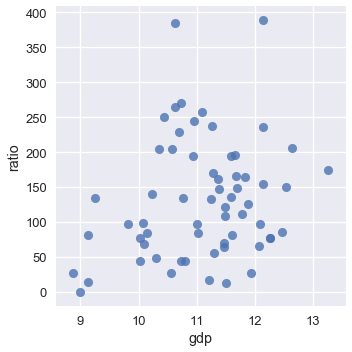

In [24]:
# GDP vs Suicide Rate
# ARG_gdp = df_gdp[df_gdp['country'] == 'Argentina']
# year = df_gdp['year'].unique()
# print(year)
# GDP vs Suicide Rate for 2016
#df_gdp = df[['country','year','suicides_no','population',' gdp_for_year ($) ','gdp_per_capita ($)']]
#year = df_sex['year'].unique()
#year = 2016
#country = df_gdp['country'].unique()
suicide_gdp = suicide_gdp[suicide_gdp.year == 2015]
#df_gdp
#print(suicide_gdp['country'].unique())
#suicide_gdp[suicide_gdp['country']=='Antigua and Barbuda']
tmp1 = suicide_gdp['country'].unique()
result1 = dict()
for i in tmp1:
    result1[i] = 0
result2 = dict()
for i in tmp1:
    result2[i] = 0
for i in suicide_gdp.index:
    country = suicide_gdp.loc[i,"country"]
    ratio = suicide_gdp.loc[i,'suicides/100k pop']
    gdp = suicide_gdp.loc[i,' gdp_for_year ($) ']
    result1[country]+= ratio
    result2[country] = gdp
country=list()
ratiolist = list()
gdplist = list()
import math
for i in tmp1:
    ratio = result1[i]
    gdp = result2[i]
    country.append(i)
    ratiolist.append(int(ratio))
    gdp = gdp.replace(',','')
    gdplist.append(math.log10(int(gdp)))
data= dict()
data = {"country":country,"ratio":ratiolist,"gdp":gdplist}

df1 = pd.DataFrame(data)

#print(ratiolist)
#print(gdplist)
df1=df1.set_index("country")
print(df1)
import seaborn as sns
%matplotlib inline
sns.lmplot(x='gdp', y='ratio', data=df1,fit_reg=False);


                   country  year  suicides_no  suicides/100k pop  population  \
564    Antigua and Barbuda  2014            0               0.00        8537   
565    Antigua and Barbuda  2014            0               0.00        7578   
566    Antigua and Barbuda  2014            0               0.00       15273   
...                    ...   ...          ...                ...         ...   
27817           Uzbekistan  2014           60               2.17     2762158   
27818           Uzbekistan  2014           44               1.67     2631600   
27819           Uzbekistan  2014           21               1.46     1438935   

       HDI for year  
564            0.78  
565            0.78  
566            0.78  
...             ...  
27817          0.68  
27818          0.68  
27819          0.68  

[900 rows x 6 columns]
                country   hdi  ratio
0   Antigua and Barbuda -0.11      0
1             Argentina -0.08    111
2               Armenia -0.13     37
..         

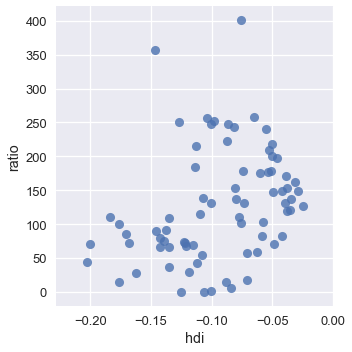

In [25]:
# HDI vs Suicide Rate for 2016
#HDI vs Suicide Rate for 2014
suicide_hdi = suicide_hdi[suicide_hdi.year == 2014]
print(suicide_hdi)
tmp1 = suicide_hdi['country'].unique()
result3 = dict()
for i in tmp1:
    result3[i] = 0

result4 = dict()
for i in tmp1:
    result4[i] = 0

for i in suicide_hdi.index:
    country = suicide_hdi.loc[i,"country"]
    ratio = suicide_hdi.loc[i,'suicides/100k pop']
    hdi = suicide_hdi.loc[i,'HDI for year']
    result3[country]+= ratio
    result4[country] = hdi
country=list()
ratiolist2 = list()
hdilist = list()
#print(result3)
#print(result4)
import math
for i in tmp1:
    ratio = result3[i]
    hdi = result4[i]
    country.append(i)
    ratiolist2.append(int(ratio))
    #hdi = hdi.replace(',','')
    hdilist.append(math.log10(float(hdi)))
data= dict()
data = {"country":country,"ratio":ratiolist2,"hdi":hdilist}
#print(data)
#print(len(country))
#print(len(ratiolist2))
#print(len(hdilist))
df2 = pd.DataFrame(data)
print(df2)
#print(ratiolist)
#print(gdplist)
df2=df2.set_index("country")
#print(df1)
import seaborn as sns
%matplotlib inline
sns.lmplot(x='hdi', y='ratio', data=df2,fit_reg=False);
